<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [2]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import shapiro 
import pingouin as pg

In [3]:
pd.options.display.float_format = '{:.2f}'.format # ustawienie ile liczb po przecinku

In [4]:
users = pd.read_csv('/home/evida-monika/mhunters/users.csv', low_memory=False)
users.head()

,id,email,encrypted_password,reset_password_token,reset_password_sent_at,remember_created_at,created_at,updated_at,gender,date_of_birth,...,total_time,kcal_per_session,reps_per_session,moengage_id,mix_panel_id,apple_id_token,imported,platform,login_token,login_token_generated_at
0,1880,franoubina@hotmail.com,$2a$11$rncTJJ3cp4t2LZfAM38a/.AtdQXaKHVozo2iQgw...,NaN,NaN,NaN,2021-10-25 11:02:55.764914,2021-12-22 06:39:38.014311,1,1982-08-26,...,NaN,NaN,NaN,NaN,572fbdf44a49a50006ffcdb9,NaN,t,NaN,298ed638-7f05-46c8-9cb0-ebfaa592db4a,2021-12-22 00:00:00
1,747,jjzjsj@gmail.com,$2a$11$LNBMldYrVAuncJumIMKbF.3PeraomE.9kNL6dAL...,NaN,NaN,NaN,2021-07-09 18:42:40.52939,2021-12-22 06:39:37.955606,1,2000-01-01,...,74.00,254.00,209.00,NaN,NaN,NaN,f,NaN,c18c522c-81ca-4904-a501-0d8138d07bee,2021-12-22 00:00:00
2,3469,omosquerapaz@gmail.com,$2a$11$krFd1rPVXoFRI1Dntgz1wuuXBQTb3cF.AzNwc1X...,NaN,NaN,NaN,2021-10-28 06:01:37.777493,2021-12-22 06:39:38.051766,1,1963-12-31,...,NaN,NaN,NaN,NaN,5787c211a6cb15000765e609,NaN,t,NaN,90d2b559-7317-4c2d-bd8a-8e2385dfe17c,2021-12-22 00:00:00
3,1876,guillermobedolla@gmail.com,$2a$11$JAS96v3t7949qEK5RRefC.Od1nswDMMLpHXSRqo...,NaN,NaN,NaN,2021-10-25 11:02:54.597607,2021-12-22 06:39:38.074943,1,1977-03-03,...,NaN,NaN,NaN,NaN,56f9ffd062ca55000ac52762,NaN,t,NaN,cee7b38d-182b-47a9-9232-bd6a8e3c3bb3,2021-12-22 00:00:00
4,1886,comercialens@gmail.com,$2a$11$muVXlfmJ0JViKVHEjefWfuLG2yRznpeZSUIXQqx...,NaN,NaN,NaN,2021-10-25 11:02:57.34532,2022-04-28 23:52:27.486079,1,1979-04-22,...,NaN,NaN,NaN,NaN,57856b74697eb3000759cdd3,NaN,t,NaN,04e09a11-7ec3-4858-9069-bb043d6584c4,2021-12-22 00:00:00


In [4]:
users.columns # do zobaczenia jakie mamy nazwy kolumn

Index(['id', 'email', 'encrypted_password', 'reset_password_token',
       'reset_password_sent_at', 'remember_created_at', 'created_at',
       'updated_at', 'gender', 'date_of_birth', 'height', 'weight',
       'activity_level', 'goal', 'body_type', 'body_fat',
       'newsletter_subscription', 'is_admin', 'names', 'last_name',
       'sign_in_count', 'current_sign_in_at', 'last_sign_in_at',
       'current_sign_in_ip', 'last_sign_in_ip', 'recover_password_code',
       'recover_password_attempts', 'facebook_uid',
       'workout_setting_voice_coach', 'workout_setting_sound',
       'workout_setting_vibration', 'workout_setting_mobility',
       'workout_setting_cardio_warmup', 'workout_setting_countdown',
       'notifications_setting', 'training_days_setting', 'google_uid',
       'language', 'country', 'points', 'scientific_data_usage', 't1_push',
       't1_core', 't1_legs', 't1_full', 't1_push_exercise', 't1_pull_up',
       't2_reps', 't2_steps', 't2_reps_push', 't2_reps_core',

In [5]:
users2 = users.drop(['email', 'encrypted_password', 
                     'reset_password_token','reset_password_sent_at',
                     'remember_created_at','is_admin','names', 'last_name',
                     'current_sign_in_ip', 'last_sign_in_ip', 
                     'recover_password_code','recover_password_attempts', 
                     'facebook_uid','workout_setting_voice_coach', 'workout_setting_sound',
                     'workout_setting_vibration', 'workout_setting_mobility',
                     'workout_setting_cardio_warmup', 'workout_setting_countdown',
                     'google_uid','t1_push','t1_core', 
                     't1_legs', 't1_full', 't1_push_exercise', 
                     't1_pull_up','t2_reps', 't2_steps', 
                     't2_reps_push', 't2_reps_core', 't2_reps_legs',
                     't2_reps_full', 't2_time_push', 't2_time_core',
                     't2_time_legs', 't2_time_full', 't1_full_exercise', 
                     't1_pull_up_exercise','warmup_setting', 
                     'warmup_session_id', 'stripe_id', 'provider', 'uid',
                     'affiliate_code', 'moengage_id', 'mix_panel_id',
                     'apple_id_token','platform', 'login_token',
                     'login_token_generated_at'], 
                    axis = 1)
# tutaj usuwamy moim zdaniem nieistotne zmienne, ale raczej trzeba bedzie wiecej usunac
users2.head()

,id,created_at,updated_at,gender,date_of_birth,height,weight,activity_level,goal,body_type,...,points,scientific_data_usage,best_weekly_streak,current_weekly_streak,affiliate_code_signup,total_sessions,total_time,kcal_per_session,reps_per_session,imported
0,1880,2021-10-25 11:02:55.764914,2021-12-22 06:39:38.014311,1,1982-08-26,185.00,105.50,2,0,1,...,25884,f,0,0,NaN,NaN,NaN,NaN,NaN,t
1,747,2021-07-09 18:42:40.52939,2021-12-22 06:39:37.955606,1,2000-01-01,160.00,60.00,1,1,0,...,100,f,1,1,NaN,1.00,74.00,254.00,209.00,f
2,3469,2021-10-28 06:01:37.777493,2021-12-22 06:39:38.051766,1,1963-12-31,180.00,105.50,1,0,2,...,580,f,0,0,NaN,NaN,NaN,NaN,NaN,t
3,1876,2021-10-25 11:02:54.597607,2021-12-22 06:39:38.074943,1,1977-03-03,184.00,118.00,1,0,2,...,0,f,0,0,NaN,NaN,NaN,NaN,NaN,t
4,1886,2021-10-25 11:02:57.34532,2022-04-28 23:52:27.486079,1,1979-04-22,173.00,75.60,2,1,1,...,11014,f,0,0,NaN,NaN,NaN,NaN,NaN,t


In [6]:
users2.describe()

,id,gender,height,weight,activity_level,goal,body_type,body_fat,sign_in_count,training_days_setting,points,best_weekly_streak,current_weekly_streak,total_sessions,total_time,kcal_per_session,reps_per_session
count,18688.00,18688.00,18688.00,18688.00,18688.00,18688.00,18688.00,18688.00,18688.00,18688.00,18688.00,18688.00,18688.00,3640.00,3640.00,3640.00,3640.00
mean,10513.94,0.58,169.67,73.16,1.25,0.70,0.71,24.28,0.92,2.90,19478.15,0.85,0.50,18.79,23281.25,48.99,10355.27
std,5501.03,0.49,23.09,15.84,0.65,0.70,0.67,8.60,3.79,1.39,93727.46,3.21,2.14,35.61,45236.45,144.33,575130.19
min,108.00,0.00,0.00,22.00,0.00,0.00,0.00,2.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
25%,5753.75,0.00,164.00,62.00,1.00,0.00,0.00,20.00,0.00,2.00,0.00,0.00,0.00,2.00,1539.50,5.15,11.00
50%,10472.50,1.00,171.00,72.00,1.00,1.00,1.00,25.00,0.00,3.00,100.00,0.00,0.00,5.00,5115.50,24.08,45.00
75%,15280.25,1.00,178.00,82.00,2.00,1.00,1.00,30.00,2.00,3.00,5047.00,0.00,0.00,19.00,21869.00,68.00,124.00
max,20066.00,1.00,1780.00,277.00,2.00,2.00,2.00,80.00,276.00,7.00,2749450.00,49.00,49.00,922.00,622509.00,4147.00,34597012.00


In [7]:
users2['affiliate_code_signup'].isna().sum() # a lot of NAs

17821

In [8]:
users2[~users2['affiliate_code_signup'].isnull()]['affiliate_code_signup']

19                      MyHixel
72                       endika
149      fitness_revolucionario
436               gloriaalcalar
565              mammothhunters
                  ...          
17491              mariapelazas
17532              mariapelazas
17590             dracaminodiaz
18338           martina_ferrer_
18577      lifestyle_con_blanca
Name: affiliate_code_signup, Length: 867, dtype: object

In [9]:
cols = ['id', 'gender', 'activity_level', 'goal', 'body_type',
        'language', 'country','affiliate_code_signup']

for col in cols:
    users2[col] = users2[col].astype('category')
    
col_bool = ['newsletter_subscription', 'notifications_setting',
            'training_days_setting','scientific_data_usage']

for col in col_bool:
    users2[col].replace('t', True, inplace = True)
    users2[col].replace('f', False, inplace = True)
    
for col in col_bool:
    users2[col] = users2[col].astype('bool')

col_date = ['created_at', 'updated_at', 'date_of_birth',
           'current_sign_in_at', 'last_sign_in_at']

for col in col_date:
    users2[col] = pd.to_datetime(users2[col])#.dt.strftime("%Y-%m-%d %H:%M:%S")

users2.replace('Argentina', 'AR', inplace = True)
users2.replace('Spain', 'ES', inplace = True)
    
users2.info() # jesli chcemy same typy to wystarczy users2.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18688 entries, 0 to 18687
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       18688 non-null  category      
 1   created_at               18688 non-null  datetime64[ns]
 2   updated_at               18688 non-null  datetime64[ns]
 3   gender                   18688 non-null  category      
 4   date_of_birth            18688 non-null  datetime64[ns]
 5   height                   18688 non-null  float64       
 6   weight                   18688 non-null  float64       
 7   activity_level           18688 non-null  category      
 8   goal                     18688 non-null  category      
 9   body_type                18688 non-null  category      
 10  body_fat                 18688 non-null  float64       
 11  newsletter_subscription  18688 non-null  bool          
 12  sign_in_count            18688 n

In [10]:
cat_names = {
    'gender': {1: 'male', 0: 'female'},
    'activity_level': {0: 'very active', 1: 'active', 2: 'sedentary'},
    'goal': {0: 'lose', 1: 'gain', 2: 'antiaging'}
    # here body type
}

users2 = users2.replace(cat_names)

In [11]:
users2['scientific_data_usage']

0        False
1        False
2        False
3        False
4        False
         ...  
18683    False
18684    False
18685    False
18686    False
18687     True
Name: scientific_data_usage, Length: 18688, dtype: bool

In [12]:
type(users2['current_sign_in_at'][0])

pandas._libs.tslibs.nattype.NaTType

In [13]:
for i in users2['current_sign_in_at']:
    users2['current_sign_in_at'] = pd.to_datetime(users2['current_sign_in_at'], format="%Y/%m/%d")

In [14]:
users2.describe()

,height,weight,body_fat,sign_in_count,points,best_weekly_streak,current_weekly_streak,total_sessions,total_time,kcal_per_session,reps_per_session
count,18688.00,18688.00,18688.00,18688.00,18688.00,18688.00,18688.00,3640.00,3640.00,3640.00,3640.00
mean,169.67,73.16,24.28,0.92,19478.15,0.85,0.50,18.79,23281.25,48.99,10355.27
std,23.09,15.84,8.60,3.79,93727.46,3.21,2.14,35.61,45236.45,144.33,575130.19
min,0.00,22.00,2.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
25%,164.00,62.00,20.00,0.00,0.00,0.00,0.00,2.00,1539.50,5.15,11.00
50%,171.00,72.00,25.00,0.00,100.00,0.00,0.00,5.00,5115.50,24.08,45.00
75%,178.00,82.00,30.00,2.00,5047.00,0.00,0.00,19.00,21869.00,68.00,124.00
max,1780.00,277.00,80.00,276.00,2749450.00,49.00,49.00,922.00,622509.00,4147.00,34597012.00


In [15]:
users2.var(numeric_only = True) # niestety tutaj tez sie wartosci bool lapia

height                             533.18
weight                             250.79
body_fat                            73.93
newsletter_subscription              0.20
sign_in_count                       14.38
notifications_setting                0.01
training_days_setting                0.00
points                      8784837124.08
scientific_data_usage                0.22
best_weekly_streak                  10.29
current_weekly_streak                4.57
total_sessions                    1268.12
total_time                  2046336681.33
kcal_per_session                 20830.65
reps_per_session          330774735472.08
dtype: float64

In [16]:
# trzeba bedzie zrobic tabele tylko z numerycznymi rzeczami i 
# pozniej z tej tabeli zrobic opisowke, a pozniej te kategoryczne i 
# bool analogicznie zrobic

In [17]:
num_table = users2.loc[:, ["height", "weight", "body_fat", "sign_in_count","points", "best_weekly_streak", "current_weekly_streak", "total_sessions", "total_time", "kcal_per_session", "reps_per_session"]]
num_table.head()

,height,weight,body_fat,sign_in_count,points,best_weekly_streak,current_weekly_streak,total_sessions,total_time,kcal_per_session,reps_per_session
0,185.00,105.50,40.00,0,25884,0,0,NaN,NaN,NaN,NaN
1,160.00,60.00,20.00,0,100,1,1,1.00,74.00,254.00,209.00
2,180.00,105.50,35.00,0,580,0,0,NaN,NaN,NaN,NaN
3,184.00,118.00,35.00,0,0,0,0,NaN,NaN,NaN,NaN
4,173.00,75.60,40.00,0,11014,0,0,NaN,NaN,NaN,NaN


In [18]:
num_table_desc = num_table.describe()
num_table_desc = num_table_desc.transpose()
num_table_desc["var"] = num_table.var()
num_table_desc["NULL count"] = num_table.isna().sum()
num_table_desc

,count,mean,std,min,25%,50%,75%,max,var,NULL count
height,18688.00,169.67,23.09,0.00,164.00,171.00,178.00,1780.00,533.18,0
weight,18688.00,73.16,15.84,22.00,62.00,72.00,82.00,277.00,250.79,0
body_fat,18688.00,24.28,8.60,2.00,20.00,25.00,30.00,80.00,73.93,0
sign_in_count,18688.00,0.92,3.79,0.00,0.00,0.00,2.00,276.00,14.38,0
points,18688.00,19478.15,93727.46,0.00,0.00,100.00,5047.00,2749450.00,8784837124.08,0
best_weekly_streak,18688.00,0.85,3.21,0.00,0.00,0.00,0.00,49.00,10.29,0
current_weekly_streak,18688.00,0.50,2.14,0.00,0.00,0.00,0.00,49.00,4.57,0
total_sessions,3640.00,18.79,35.61,1.00,2.00,5.00,19.00,922.00,1268.12,15048
total_time,3640.00,23281.25,45236.45,0.00,1539.50,5115.50,21869.00,622509.00,2046336681.33,15048
kcal_per_session,3640.00,48.99,144.33,0.00,5.15,24.08,68.00,4147.00,20830.65,15048


In [19]:
shapiro(num_table.loc[:, 'body_fat'])

/home/evida-monika/anaconda3/envs/mhunters/lib/python3.10/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.945935845375061, pvalue=0.0)

In [20]:
normal = pg.normality(num_table, method='normaltest').round(3)
normal.transpose()

,height,weight,body_fat,sign_in_count,points,best_weekly_streak,current_weekly_streak,total_sessions,total_time,kcal_per_session,reps_per_session
W,41185.34,5988.58,1223.51,53227.44,33634.65,23710.26,31732.83,4902.10,3075.31,7877.15,12285.60
pval,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
normal,False,False,False,False,False,False,False,False,False,False,False


Text(0.5, 0.98, 'Histogram plots for all numeric variables')

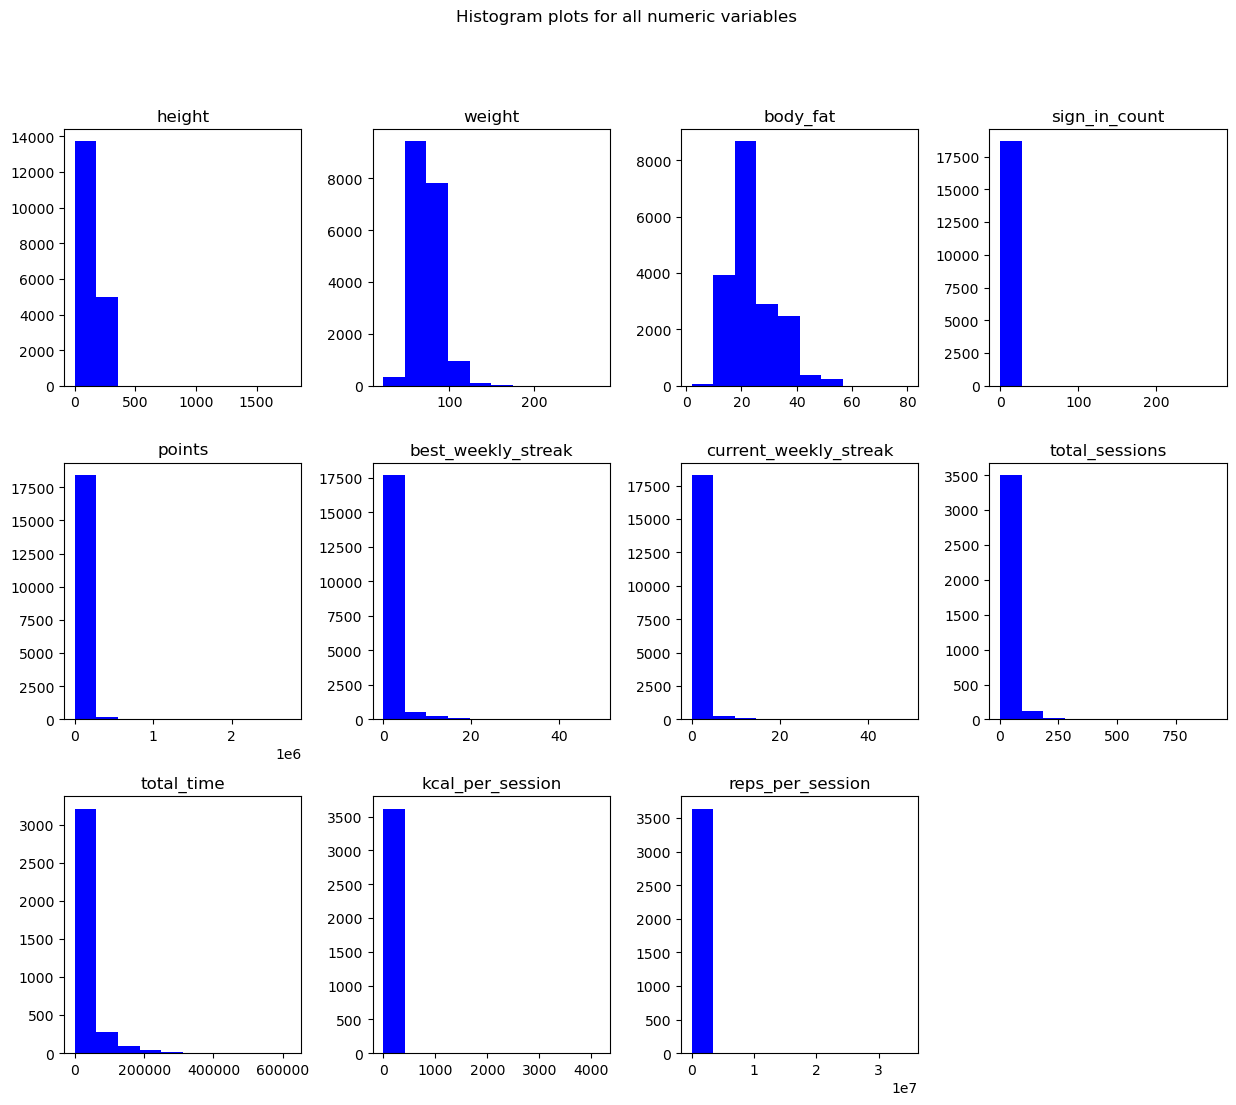

In [21]:
num_table.hist(layout=(3,4), color = 'blue', figsize = (15,12), grid = False)
plt.suptitle('Histogram plots for all numeric variables')

<AxesSubplot:>

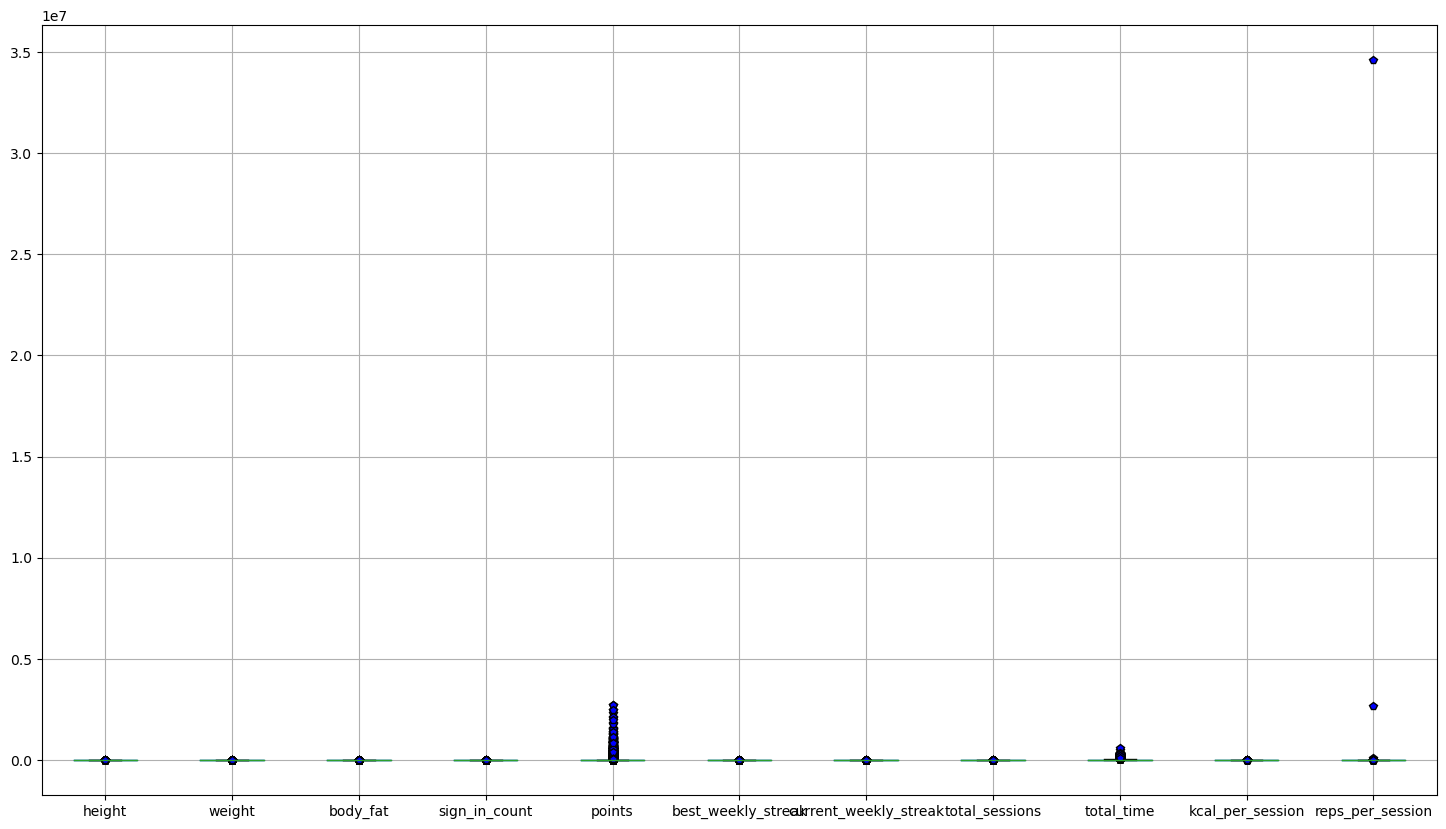

In [22]:
num_table.boxplot(figsize=(18,10), flierprops = dict(markerfacecolor='b', marker = 'p'))

In [23]:
num_table.loc[:, 'weight']

0       105.50
1        60.00
2       105.50
3       118.00
4        75.60
         ...  
18683    72.00
18684    50.00
18685    50.00
18686    55.00
18687    55.00
Name: weight, Length: 18688, dtype: float64

In [24]:
num_table_null = users2.loc[:, ["total_sessions", "total_time", "kcal_per_session", "reps_per_session"]]
num_table_null.head()

,total_sessions,total_time,kcal_per_session,reps_per_session
0,NaN,NaN,NaN,NaN
1,1.00,74.00,254.00,209.00
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN


In [25]:
num_table_null = num_table_null.dropna()
num_table_null_desc = num_table_null.describe().transpose()
num_table_null_desc["var"] = num_table_null.var()
num_table_null_desc["NULL count"] = num_table_null.isna().sum()
num_table_null_desc

,count,mean,std,min,25%,50%,75%,max,var,NULL count
total_sessions,3640.00,18.79,35.61,1.00,2.00,5.00,19.00,922.00,1268.12,0
total_time,3640.00,23281.25,45236.45,0.00,1539.50,5115.50,21869.00,622509.00,2046336681.33,0
kcal_per_session,3640.00,48.99,144.33,0.00,5.15,24.08,68.00,4147.00,20830.65,0
reps_per_session,3640.00,10355.27,575130.19,0.00,11.00,45.00,124.00,34597012.00,330774735472.08,0


In [26]:
num_table_null2 = users2.loc[:, ["total_sessions", "total_time", "kcal_per_session", "reps_per_session"]]
num_table_null2 = num_table_null2.fillna(num_table_null2.mean())
num_table_null2.head()

,total_sessions,total_time,kcal_per_session,reps_per_session
0,18.79,23281.25,48.99,10355.27
1,1.00,74.00,254.00,209.00
2,18.79,23281.25,48.99,10355.27
3,18.79,23281.25,48.99,10355.27
4,18.79,23281.25,48.99,10355.27


In [27]:
num_table_null_desc2  = num_table_null2.describe().transpose()
num_table_null_desc2["var"] = num_table_null2.var()
num_table_null_desc2["NULL count"] = num_table_null2.isna().sum()
num_table_null_desc2

,count,mean,std,min,25%,50%,75%,max,var,NULL count
total_sessions,18688.00,18.79,15.71,1.00,18.79,18.79,18.79,922.00,246.95,0
total_time,18688.00,23281.25,19962.26,0.00,23281.25,23281.25,23281.25,622509.00,398491956.09,0
kcal_per_session,18688.00,48.99,63.69,0.00,48.99,48.99,48.99,4147.00,4056.44,0
reps_per_session,18688.00,10355.27,253797.54,0.00,10355.27,10355.27,10355.27,34597012.00,64413188975.38,0


In [28]:
num_table2 = num_table
num_table2 = num_table2.fillna(num_table2.mean())
num_table2.head()

,height,weight,body_fat,sign_in_count,points,best_weekly_streak,current_weekly_streak,total_sessions,total_time,kcal_per_session,reps_per_session
0,185.00,105.50,40.00,0,25884,0,0,18.79,23281.25,48.99,10355.27
1,160.00,60.00,20.00,0,100,1,1,1.00,74.00,254.00,209.00
2,180.00,105.50,35.00,0,580,0,0,18.79,23281.25,48.99,10355.27
3,184.00,118.00,35.00,0,0,0,0,18.79,23281.25,48.99,10355.27
4,173.00,75.60,40.00,0,11014,0,0,18.79,23281.25,48.99,10355.27


In [29]:
num_table_desc2  = num_table2.describe().transpose()
num_table_desc2["var"] = num_table2.var()
num_table_desc2["NULL count"] = num_table2.isna().sum()
num_table_desc2

,count,mean,std,min,25%,50%,75%,max,var,NULL count
height,18688.00,169.67,23.09,0.00,164.00,171.00,178.00,1780.00,533.18,0
weight,18688.00,73.16,15.84,22.00,62.00,72.00,82.00,277.00,250.79,0
body_fat,18688.00,24.28,8.60,2.00,20.00,25.00,30.00,80.00,73.93,0
sign_in_count,18688.00,0.92,3.79,0.00,0.00,0.00,2.00,276.00,14.38,0
points,18688.00,19478.15,93727.46,0.00,0.00,100.00,5047.00,2749450.00,8784837124.08,0
best_weekly_streak,18688.00,0.85,3.21,0.00,0.00,0.00,0.00,49.00,10.29,0
current_weekly_streak,18688.00,0.50,2.14,0.00,0.00,0.00,0.00,49.00,4.57,0
total_sessions,18688.00,18.79,15.71,1.00,18.79,18.79,18.79,922.00,246.95,0
total_time,18688.00,23281.25,19962.26,0.00,23281.25,23281.25,23281.25,622509.00,398491956.09,0
kcal_per_session,18688.00,48.99,63.69,0.00,48.99,48.99,48.99,4147.00,4056.44,0


In [30]:
num_table3 = num_table
num_table3 = num_table3.dropna()
num_table3_desc = num_table3.describe().transpose()
num_table3_desc["var"] = num_table3.var()
num_table3_desc["NULL count"] = num_table3.isna().sum()
num_table3_desc

,count,mean,std,min,25%,50%,75%,max,var,NULL count
height,3640.00,170.43,15.23,1.00,164.00,171.00,178.00,221.00,232.02,0
weight,3640.00,71.91,15.34,40.00,61.00,71.00,80.00,277.00,235.40,0
body_fat,3640.00,23.69,8.22,6.00,20.00,21.00,30.00,50.00,67.59,0
sign_in_count,3640.00,2.55,6.53,0.00,0.00,2.00,3.00,181.00,42.62,0
points,3640.00,57203.82,169665.95,0.00,300.00,2100.00,37676.50,2749450.00,28786536173.70,0
best_weekly_streak,3640.00,4.37,6.12,1.00,1.00,2.00,5.00,49.00,37.46,0
current_weekly_streak,3640.00,2.55,4.27,1.00,1.00,1.00,2.00,49.00,18.23,0
total_sessions,3640.00,18.79,35.61,1.00,2.00,5.00,19.00,922.00,1268.12,0
total_time,3640.00,23281.25,45236.45,0.00,1539.50,5115.50,21869.00,622509.00,2046336681.33,0
kcal_per_session,3640.00,48.99,144.33,0.00,5.15,24.08,68.00,4147.00,20830.65,0


In [31]:
bool_table = users2.loc[:, ["newsletter_subscription",
                             "notifications_setting",
                             "training_days_setting",
                             "imported"]]
bool_table.head()

,newsletter_subscription,notifications_setting,training_days_setting,imported
0,True,True,True,t
1,True,True,True,f
2,True,True,True,t
3,True,True,True,t
4,True,True,True,t


In [32]:
bool_table.describe().transpose()

,count,unique,top,freq
newsletter_subscription,18688,2,True,13458
notifications_setting,18688,2,True,18581
training_days_setting,18688,1,True,18688
imported,18688,2,f,10024


In [33]:
num_table.columns

Index(['height', 'weight', 'body_fat', 'sign_in_count', 'points',
       'best_weekly_streak', 'current_weekly_streak', 'total_sessions',
       'total_time', 'kcal_per_session', 'reps_per_session'],
      dtype='object')

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa00f145a20>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa00f145fc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa00f145750>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa00f146560>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa00f146830>],
 'means': []}

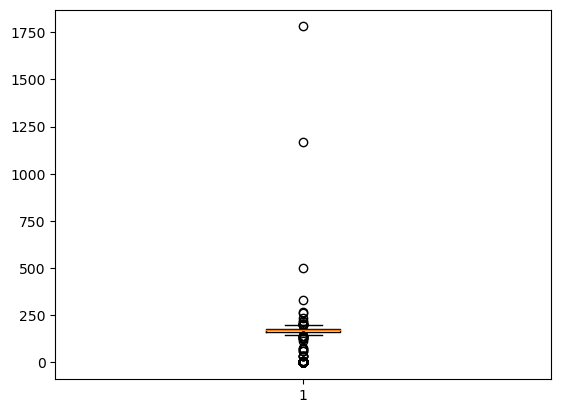

In [34]:
plt.boxplot(num_table['height'])

/home/evida-monika/anaconda3/envs/mhunters/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='height'>

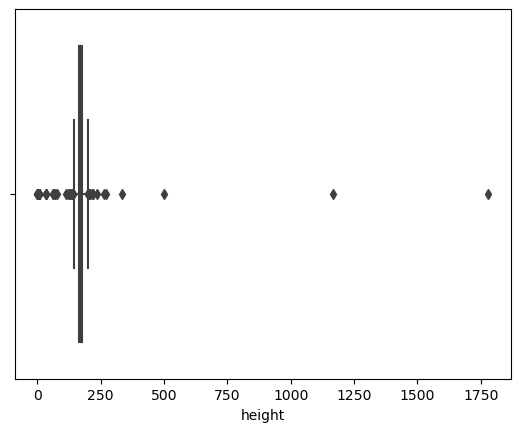

In [35]:
sns.boxplot(num_table['height'])

In [36]:
cat_table = users2.loc[:, ['gender', 'activity_level', 'goal', 'body_type', 'language', 'country', 'affiliate_code_signup']]
cat_table

,gender,activity_level,goal,body_type,language,country,affiliate_code_signup
0,male,sedentary,lose,1,es,ES,NaN
1,male,active,gain,0,es,NaN,NaN
2,male,active,lose,2,es,ES,NaN
3,male,active,lose,2,es,MX,NaN
4,male,sedentary,gain,1,es,ES,NaN
...,...,...,...,...,...,...,...
18683,male,active,gain,1,es,NaN,NaN
18684,female,very active,antiaging,0,es,NaN,NaN
18685,male,active,gain,0,es,NaN,NaN
18686,male,sedentary,lose,0,es,NaN,NaN


In [37]:
type(cat_table['gender'][0])

str

In [38]:
cat_table = cat_table.replace(cat_names)
cat_table

,gender,activity_level,goal,body_type,language,country,affiliate_code_signup
0,male,sedentary,lose,1,es,ES,NaN
1,male,active,gain,0,es,NaN,NaN
2,male,active,lose,2,es,ES,NaN
3,male,active,lose,2,es,MX,NaN
4,male,sedentary,gain,1,es,ES,NaN
...,...,...,...,...,...,...,...
18683,male,active,gain,1,es,NaN,NaN
18684,female,very active,antiaging,0,es,NaN,NaN
18685,male,active,gain,0,es,NaN,NaN
18686,male,sedentary,lose,0,es,NaN,NaN


In [39]:
cat_table['gender'].value_counts()

male      10917
female     7771
Name: gender, dtype: int64

In [40]:
cat_table['gender'].cat.categories

Index(['female', 'male'], dtype='object')

In [41]:
cats = cat_table['gender'].cat.add_categories(['Total'])
cats.cat.categories

Index(['female', 'male', 'Total'], dtype='object')

In [42]:
myMissingCategory = 'nan'
isNonmisAr = np.array([])

for i in cat_table['country']:
    isNotMissing=1
    # for j in myMissingCategory:
    if i=='nan':
        isNotMissing=0
    isNonmisAr = np.append(isNonmisAr, [isNotMissing])

In [43]:
isNonmisAr

array([1., 1., 1., ..., 1., 1., 1.])

In [44]:
for i in cat_table['country']:
    if i==np.NaN:
        print(i)

In [45]:
def my_freq_table(data, var, sort = True, cumul_percent = False):
    myFreqTable = data[var].value_counts()
    myFreqTable = pd.DataFrame({var: myFreqTable.keys(), 'Frequency': myFreqTable.values})
    myFreqTable = myFreqTable.astype({'Frequency': 'int32'})
    
    if sort == True:
        myFreqTable = myFreqTable.sort_values(by=[var])
        myFreqTable = myFreqTable.reset_index(drop=True)
    
    myFreqTable['Percent'] = myFreqTable['Frequency']/myFreqTable['Frequency'].sum()*100
    
    sum_row1 = myFreqTable['Frequency'].sum()
    sum_row2 = myFreqTable['Percent'].sum()
    sum_row2 = sum_row2.round(2).astype('str') + '%'
    
    myFreqTable['Percent'] = myFreqTable['Percent'].round(2).astype('str') + '%'
    
    if cumul_percent == True:
        myFreqTable['Cumulative Percent'] = myFreqTable['Frequency'].cumsum() / myFreqTable['Frequency'].sum() * 100
        myFreqTable['Cumulative Percent'] = myFreqTable['Cumulative Percent'].round(2).astype('str') + '%'
        sum_row_c = '-'
    
    '''
    if valid_percent == True:
    
        myMissingCategory = [np.NaN]

        myFreqTable2 = myFreqTable
        isNonmisAr = np.array([])

        for i in data[var]:
            isNotMissing=1
            for j in myMissingCategory:
                if i==j:
                    isNotMissing=0
            isNonmisAr = np.append(isNonmisAr, [isNotMissing])
        
        validSum = sum(myFreqTable2['Frequency']*isNonmisAr)
        validPerc = myFreqTable2['Frequency']/validSum*isNonmisAr*100
        
        for i in range(len(validPerc)):
            if isNonmisAr[i]==0:
                validPerc[i]=np.nan
        
        myFreqTable2['Valid Percent'] = validPerc
        
        if cumul_percent == True:
            myFreqTable2['Cumulative Valid Percent'] = myFreqTable2['Valid Percent'].cumsum()
            
            sum_c_2 = '-'
            
            myFreqTable2['Cumulative Valid Percent'] = myFreqTable2['Cumulative Valid Percent'].round(2).astype('str') + '%'
        
        sum_valid_percent = myFreqTable2['Valid Percent'].sum()
        
        myFreqTable2['Valid Percent'] = myFreqTable2['Valid Percent'].round(2).astype('str') + '%'
        
        sum_valid_percent = sum_valid_percent.round(2).astype('str') + '%'
        
        #myFreqTable2 = myFreqTable2.set_index(var)
        
        # return(myFreqTable2)
    
       
    if (valid_percent == True) and (cumul_percent == True):
        new_rows = {'Frequency': sum_row1, 'Percent': sum_row2, 
                    'Cumulative Percent': sum_row_c, 
                    'Valid Percent': sum_valid_percent,
                    'Cumulative Valid Percent': sum_c_2}
        
    elif (valid_percent == False) and (cumul_percent == True):
        new_rows = {'Frequency': sum_row1, 'Percent': sum_row2, 
                    'Cumulative Percent': sum_row_c}
        
    elif (valid_percent == True) and (cumul_percent == False):
        new_rows = {'Frequency': sum_row1, 'Percent': sum_row2,
                    'Valid Percent': sum_valid_percent}
            
    else: new_rows = {'Frequency': sum_row1, 'Percent': sum_row2}
    
    if valid_percent == True:
        myFreqTable = myFreqTable2
    '''
    
    if cumul_percent == True:
        new_rows = {'Frequency': sum_row1, 'Percent': sum_row2, 
                    'Cumulative Percent': sum_row_c}
    else: new_rows = {'Frequency': sum_row1, 'Percent': sum_row2}
    
    myFreqTable = myFreqTable.append(new_rows, ignore_index=True)
    cats = data[var].cat.add_categories(['Total'])
    myFreqTable.set_index(cats.cat.categories, inplace = True)
    
    cols = myFreqTable.columns
    
    for col in cols:
        if col == var:
            myFreqTable = myFreqTable.drop(var, axis = 1)
    #myFreqTable.rename(index = {'NaN': 'Total'}, inplace = True)
    
    return(myFreqTable)
    

In [46]:
my_freq_table(cat_table, var = 'gender', cumul_percent = True)

/tmp/ipykernel_4620/1421686967.py:90: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  myFreqTable = myFreqTable.append(new_rows, ignore_index=True)


,Frequency,Percent,Cumulative Percent
female,7771,41.58%,41.58%
male,10917,58.42%,100.0%
Total,18688,100.0%,-


In [47]:
my_freq_table(cat_table, var = 'activity_level', cumul_percent = False)

/tmp/ipykernel_4620/1421686967.py:90: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  myFreqTable = myFreqTable.append(new_rows, ignore_index=True)


,Frequency,Percent
very active,2168,11.6%
active,9728,52.05%
sedentary,6792,36.34%
Total,18688,100.0%


In [48]:
cat_table.replace('Argentina', 'AR', inplace = True)
cat_table.replace('Spain', 'ES', inplace = True)

In [49]:
my_freq_table(cat_table, var = 'country', cumul_percent = True).transpose()

/tmp/ipykernel_4620/1421686967.py:90: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  myFreqTable = myFreqTable.append(new_rows, ignore_index=True)


,AD,AE,AR,AT,AU,AZ,BE,BG,BO,BR,...,TC,TH,TW,US,UY,VE,VN,ZA,ZW,Total
Frequency,3,7,219,7,22,1,10,1,6,3,...,1,7,1,273,25,3,2,3,1,6352
Percent,0.05%,0.11%,3.45%,0.11%,0.35%,0.02%,0.16%,0.02%,0.09%,0.05%,...,0.02%,0.11%,0.02%,4.3%,0.39%,0.05%,0.03%,0.05%,0.02%,100.0%
Cumulative Percent,0.05%,0.16%,3.61%,3.72%,4.06%,4.08%,4.23%,4.25%,4.35%,4.39%,...,95.04%,95.15%,95.17%,99.46%,99.86%,99.91%,99.94%,99.98%,100.0%,-


In [50]:
cat2 = cat_table
cat2['country_count'] = cat2['country'].str.len()

k = 0

for i in range(len(cat2['country_count'])):
    if cat2['country_count'][i] > 2:
        k = k+1
        
k

0

In [51]:
my_freq_table(cat_table, var = 'goal', cumul_percent = True)

/tmp/ipykernel_4620/1421686967.py:90: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  myFreqTable = myFreqTable.append(new_rows, ignore_index=True)


,Frequency,Percent,Cumulative Percent
lose,8257,44.18%,44.18%
gain,7838,41.94%,86.12%
antiaging,2593,13.88%,100.0%
Total,18688,100.0%,-


In [52]:
my_freq_table(cat_table, var = 'language', cumul_percent = True)

/tmp/ipykernel_4620/1421686967.py:90: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  myFreqTable = myFreqTable.append(new_rows, ignore_index=True)


,Frequency,Percent,Cumulative Percent
en,1245,6.66%,6.66%
es,17443,93.34%,100.0%
Total,18688,100.0%,-


In [53]:
my_freq_table(cat_table, var = 'affiliate_code_signup', cumul_percent = True)

/tmp/ipykernel_4620/1421686967.py:90: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  myFreqTable = myFreqTable.append(new_rows, ignore_index=True)


,Frequency,Percent,Cumulative Percent
Anavb87,1,0.12%,0.12%
MerakiFit,2,0.23%,0.35%
MyHixel,19,2.19%,2.54%
anabel_freyes,1,0.12%,2.65%
andreajuan,2,0.23%,2.88%
blanca,3,0.35%,3.23%
cristinamanyer,37,4.27%,7.5%
dracaminodiaz,8,0.92%,8.42%
eat2winmedia,1,0.12%,8.54%
endika,271,31.26%,39.79%


In [54]:
users2['scientific_data_usage'] = users2['scientific_data_usage'].astype('category')
my_freq_table(users2, 'scientific_data_usage')

/tmp/ipykernel_4620/1421686967.py:90: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  myFreqTable = myFreqTable.append(new_rows, ignore_index=True)


,Frequency,Percent
False,12830,68.65%
True,5858,31.35%
Total,18688,100.0%


In [55]:
users3 = users2[users2['scientific_data_usage'] == True]
users3.head()
users3.shape

(5858, 29)

In [56]:
users3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5858 entries, 5 to 18687
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       5858 non-null   category      
 1   created_at               5858 non-null   datetime64[ns]
 2   updated_at               5858 non-null   datetime64[ns]
 3   gender                   5858 non-null   category      
 4   date_of_birth            5858 non-null   datetime64[ns]
 5   height                   5858 non-null   float64       
 6   weight                   5858 non-null   float64       
 7   activity_level           5858 non-null   category      
 8   goal                     5858 non-null   category      
 9   body_type                5858 non-null   category      
 10  body_fat                 5858 non-null   float64       
 11  newsletter_subscription  5858 non-null   bool          
 12  sign_in_count            5858 non

In [57]:
my_freq_table(users3, var = 'affiliate_code_signup', cumul_percent = True)

/tmp/ipykernel_4620/1421686967.py:90: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  myFreqTable = myFreqTable.append(new_rows, ignore_index=True)


,Frequency,Percent,Cumulative Percent
Anavb87,0,0.0%,0.0%
MerakiFit,0,0.0%,0.0%
MyHixel,0,0.0%,0.0%
anabel_freyes,0,0.0%,0.0%
andreajuan,0,0.0%,0.0%
blanca,0,0.0%,0.0%
cristinamanyer,1,7.69%,7.69%
dracaminodiaz,0,0.0%,7.69%
eat2winmedia,0,0.0%,7.69%
endika,4,30.77%,38.46%


In [58]:
users3.columns

Index(['id', 'created_at', 'updated_at', 'gender', 'date_of_birth', 'height',
       'weight', 'activity_level', 'goal', 'body_type', 'body_fat',
       'newsletter_subscription', 'sign_in_count', 'current_sign_in_at',
       'last_sign_in_at', 'notifications_setting', 'training_days_setting',
       'language', 'country', 'points', 'scientific_data_usage',
       'best_weekly_streak', 'current_weekly_streak', 'affiliate_code_signup',
       'total_sessions', 'total_time', 'kcal_per_session', 'reps_per_session',
       'imported'],
      dtype='object')

In [59]:
users3['height'].isna().sum()

0

In [60]:
nulls = []

for col in users3.columns:
    nulls.append(users3[col].isna().sum())

nulls_df = pd.DataFrame(nulls)
nulls_df.set_index(users3.columns, inplace = True)

In [61]:
nulls_df

,0
id,0
created_at,0
updated_at,0
gender,0
date_of_birth,0
height,0
weight,0
activity_level,0
goal,0
body_type,0


In [62]:
my_freq_table(users3, var = 'country', cumul_percent = True).transpose()

/tmp/ipykernel_4620/1421686967.py:90: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  myFreqTable = myFreqTable.append(new_rows, ignore_index=True)


,AD,AE,AR,AT,AU,AZ,BE,BG,BO,BR,...,TC,TH,TW,US,UY,VE,VN,ZA,ZW,Total
Frequency,0,0,9,1,1,0,0,0,0,0,...,0,0,0,4,1,0,0,0,0,215
Percent,0.0%,0.0%,4.19%,0.47%,0.47%,0.0%,0.0%,0.0%,0.0%,0.0%,...,0.0%,0.0%,0.0%,1.86%,0.47%,0.0%,0.0%,0.0%,0.0%,100.0%
Cumulative Percent,0.0%,0.0%,4.19%,4.65%,5.12%,5.12%,5.12%,5.12%,5.12%,5.12%,...,97.67%,97.67%,97.67%,99.53%,100.0%,100.0%,100.0%,100.0%,100.0%,-


In [63]:
my_freq_table(users3, var = 'gender', cumul_percent = True)

/tmp/ipykernel_4620/1421686967.py:90: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  myFreqTable = myFreqTable.append(new_rows, ignore_index=True)


,Frequency,Percent,Cumulative Percent
female,2981,50.89%,50.89%
male,2877,49.11%,100.0%
Total,5858,100.0%,-


In [64]:
my_freq_table(users3, var = 'activity_level', cumul_percent = False)

/tmp/ipykernel_4620/1421686967.py:90: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  myFreqTable = myFreqTable.append(new_rows, ignore_index=True)


,Frequency,Percent
very active,531,9.06%
active,2907,49.62%
sedentary,2420,41.31%
Total,5858,100.0%


In [65]:
my_freq_table(users3, var = 'activity_level', cumul_percent = False)

/tmp/ipykernel_4620/1421686967.py:90: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  myFreqTable = myFreqTable.append(new_rows, ignore_index=True)


,Frequency,Percent
very active,531,9.06%
active,2907,49.62%
sedentary,2420,41.31%
Total,5858,100.0%


In [66]:
user_achievements = pd.read_csv('/home/evida-monika/mhunters/user_achievments.csv', on_bad_lines='skip', low_memory=False)

user_achievements2 = user_achievements.sort_values('updated_at').groupby('user_id').tail(1) # latest value of achievement for each id

user_achievements2
# user_achievements2.merge(users2, how = 'left', left_on = 'user_id', right_on = 'id') # right join

,id,user_id,achievment_id,created_at,updated_at
4,5,571,3,2021-06-03 05:29:39.984727,2021-06-03 05:29:39.984727
9,10,579,3,2021-06-08 10:17:48.559565,2021-06-08 10:17:48.559565
11,12,584,3,2021-06-09 14:06:36.118031,2021-06-09 14:06:36.118031
18,19,623,3,2021-06-11 03:19:35.718886,2021-06-11 03:19:35.718886
22,23,576,3,2021-06-11 08:20:29.024699,2021-06-11 08:20:29.024699
...,...,...,...,...,...
31760,32390,20033,3,2022-09-11 13:40:55.520173,2022-09-11 13:40:55.520173
31761,32391,19371,5,2022-09-11 14:48:12.612773,2022-09-11 14:48:12.612773
31762,32392,19317,5,2022-09-11 18:00:43.515942,2022-09-11 18:00:43.515942
31763,32393,10168,14,2022-09-12 07:03:20.173034,2022-09-12 07:03:20.173034


In [67]:
user_achievements2['user_id'].nunique()

3625

In [68]:
user_achievements2 = user_achievements2.merge(users2, how = 'right', left_on = 'user_id', right_on = 'id')

In [69]:
user_achievements2

,id_x,user_id,achievment_id,created_at_x,updated_at_x,id_y,created_at_y,updated_at_y,gender,date_of_birth,...,points,scientific_data_usage,best_weekly_streak,current_weekly_streak,affiliate_code_signup,total_sessions,total_time,kcal_per_session,reps_per_session,imported
0,NaN,NaN,NaN,NaN,NaN,1880,2021-10-25 11:02:55.764914,2021-12-22 06:39:38.014311,male,1982-08-26,...,25884,False,0,0,NaN,NaN,NaN,NaN,NaN,t
1,247.00,747,3.00,2021-07-09 18:52:08.499869,2021-07-09 18:52:08.499869,747,2021-07-09 18:42:40.529390,2021-12-22 06:39:37.955606,male,2000-01-01,...,100,False,1,1,NaN,1.00,74.00,254.00,209.00,f
2,NaN,NaN,NaN,NaN,NaN,3469,2021-10-28 06:01:37.777493,2021-12-22 06:39:38.051766,male,1963-12-31,...,580,False,0,0,NaN,NaN,NaN,NaN,NaN,t
3,NaN,NaN,NaN,NaN,NaN,1876,2021-10-25 11:02:54.597607,2021-12-22 06:39:38.074943,male,1977-03-03,...,0,False,0,0,NaN,NaN,NaN,NaN,NaN,t
4,NaN,NaN,NaN,NaN,NaN,1886,2021-10-25 11:02:57.345320,2022-04-28 23:52:27.486079,male,1979-04-22,...,11014,False,0,0,NaN,NaN,NaN,NaN,NaN,t
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18683,NaN,NaN,NaN,NaN,NaN,20062,2022-09-12 20:57:51.854812,2022-09-12 20:57:51.854812,male,1983-06-16,...,0,False,0,0,NaN,NaN,NaN,NaN,NaN,f
18684,NaN,NaN,NaN,NaN,NaN,20063,2022-09-12 21:05:34.949417,2022-09-12 21:05:34.949417,female,1985-06-05,...,0,False,0,0,NaN,NaN,NaN,NaN,NaN,f
18685,NaN,NaN,NaN,NaN,NaN,20065,2022-09-12 21:50:48.184245,2022-09-12 21:53:03.164483,male,2008-02-24,...,0,False,0,0,NaN,NaN,NaN,NaN,NaN,f
18686,NaN,NaN,NaN,NaN,NaN,20066,2022-09-12 22:29:06.094089,2022-09-12 22:29:06.094089,male,2007-11-07,...,0,False,0,0,NaN,NaN,NaN,NaN,NaN,f


In [70]:
type(user_achievements2['points'][0])

numpy.int64

In [71]:
k = 0
j = 0
l = 0
m = 0

x = np.isnan(user_achievements2['achievment_id'])

for i in range(len(user_achievements2)):
    if user_achievements2['points'][i] == 0:
        if x[i] == False:
            k = k+1
        else: j = j+1
    elif user_achievements2['points'][i] > 0:
        if x[i] == True:
            l = l+1
        else: m = m+1
        
    i = i+1

print('Have 0 points and achievement assigned:',k,'\n',
      'Have 0 points and no achievement assigned:', j, '\n',
      'Have points and no achievement assigned:', l, '\n',
      'Have points and achievement assigned:', m) 


Have 0 points and achievement assigned: 0 
 Have 0 points and no achievement assigned: 9183 
 Have points and no achievement assigned: 5880 
 Have points and achievement assigned: 3625


In [72]:
type(users2['sign_in_count'][0])

numpy.int64

In [73]:
k = 0
j = 0

x = np.isnat(np.array(users2['current_sign_in_at'], dtype=np.datetime64))

for i in range(len(users2)):
    if users2['sign_in_count'][i] == 0:
        if x[i] == False:
            k += 1
        j += 1
            
print('j', j, 'k', k)

j 13320 k 0


In [74]:
np.isnat(np.array(users2['current_sign_in_at'], dtype=np.datetime64))

array([ True,  True,  True, ..., False,  True, False])

In [9]:
users15 = users.drop(['email', 'encrypted_password', 
                     'reset_password_token','reset_password_sent_at','is_admin','names', 'last_name',
                     'current_sign_in_ip', 'last_sign_in_ip', 
                     'recover_password_code','recover_password_attempts', 
                     'facebook_uid','workout_setting_voice_coach', 'workout_setting_sound',
                     'workout_setting_vibration', 'workout_setting_mobility',
                     'workout_setting_cardio_warmup', 'workout_setting_countdown',
                     'google_uid','t1_push','t1_core', 
                     't1_legs', 't1_full', 't1_push_exercise', 
                     't1_pull_up','t2_reps', 't2_steps', 
                     't2_reps_push', 't2_reps_core', 't2_reps_legs',
                     't2_reps_full', 't2_time_push', 't2_time_core',
                     't2_time_legs', 't2_time_full', 't1_full_exercise', 
                     't1_pull_up_exercise', 'stripe_id', 'provider', 'uid','moengage_id', 'mix_panel_id',
                     'apple_id_token','platform', 'login_token',
                     'login_token_generated_at'], 
                    axis = 1)
# here we do not delete warmup setting
users15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18688 entries, 0 to 18687
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       18688 non-null  int64  
 1   remember_created_at      2 non-null      object 
 2   created_at               18688 non-null  object 
 3   updated_at               18688 non-null  object 
 4   gender                   18688 non-null  int64  
 5   date_of_birth            18688 non-null  object 
 6   height                   18688 non-null  float64
 7   weight                   18688 non-null  float64
 8   activity_level           18688 non-null  int64  
 9   goal                     18688 non-null  int64  
 10  body_type                18688 non-null  int64  
 11  body_fat                 18688 non-null  float64
 12  newsletter_subscription  18688 non-null  object 
 13  sign_in_count            18688 non-null  int64  
 14  current_sign_in_at    

In [10]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18688 entries, 0 to 18687
Data columns (total 79 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             18688 non-null  int64  
 1   email                          18688 non-null  object 
 2   encrypted_password             18688 non-null  object 
 3   reset_password_token           0 non-null      float64
 4   reset_password_sent_at         0 non-null      float64
 5   remember_created_at            2 non-null      object 
 6   created_at                     18688 non-null  object 
 7   updated_at                     18688 non-null  object 
 8   gender                         18688 non-null  int64  
 9   date_of_birth                  18688 non-null  object 
 10  height                         18688 non-null  float64
 11  weight                         18688 non-null  float64
 12  activity_level                 18688 non-null 